In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [4]:
adult = pd.read_csv('adult.data')
adult.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [21]:
adult_index = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [22]:
adult.columns = adult_index

In [23]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [15]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
weight            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [24]:
adult["income"].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [25]:
adult_hot = pd.get_dummies(adult)

In [26]:
adult_hot.head

<bound method NDFrame.head of        age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       50   83311             13             0             0              13   
1       38  215646              9             0             0              40   
2       53  234721              7             0             0              40   
3       28  338409             13             0             0              40   
4       37  284582             14             0             0              40   
5       49  160187              5             0             0              16   
6       52  209642              9             0             0              45   
7       31   45781             14         14084             0              50   
8       42  159449             13          5178             0              40   
9       37  280464             10             0             0              80   
10      30  141297             13             0             0              40  

In [31]:
y = adult_hot['income_ <=50K']
X = adult_hot.iloc[:,:-2]
X.shape, y.shape

((32560, 108), (32560,))

In [51]:

m_train = 24420
X_train = X[:m_train]
X_test = X[m_train:]
y_train = y[:m_train]
y_test = y[m_train:]



In [58]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=50).fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test, y_test)

(0.9999180999180999, 0.8131449631449631)

In [59]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp = MLPClassifier().fit(X_train,y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test) # 과소적합, under fitting

(0.7868140868140868, 0.7877149877149877)

In [60]:
mlp =MLPClassifier(hidden_layer_sizes=(100,40,30)).fit(X_train, y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test) # 과소적합, under fitting

(0.7142506142506142, 0.7189189189189189)

In [61]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
adc.score(X_train,y_train), adc.score(X_test, y_test)

(0.8597051597051597, 0.8653562653562653)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001112743AF28>,
      dtype=object)

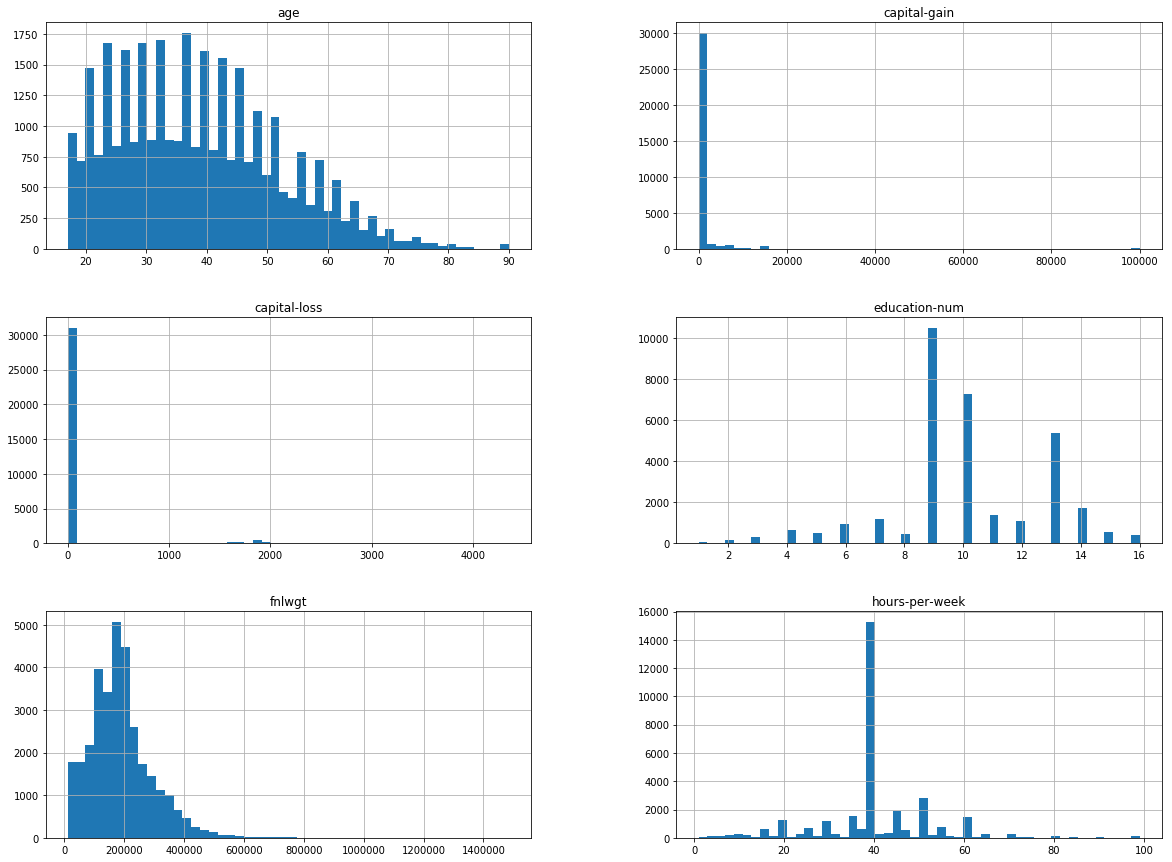

In [62]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
adult.hist(bins=50, figsize=(20,15))

In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
model.score(X_train, y_train), model.score(X_test, y_test)


(0.8542178542178542, 0.8539312039312039)

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [66]:
rf.score(X_test,y_test)

0.8549140049140049

## 시험 : 1. 분류, 2. 예측(회기), 3. 비지도학습 - 군집화
- 테스트 분류 정확도 최대한 높은 모델을 찾으세요.
- 무엇이 수입에 영향을 끼치는지 보여주세요. Tree 그래프, 상관관계, coefficient